# Lab 2 expand data



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import json_normalize
import requests
from bs4 import BeautifulSoup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize
from random import randint
from time import sleep
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Send a GET request to the URL
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all list items with class 'o-chart-results-list__item'
song_items = soup.find_all('li', class_='o-chart-results-list__item')

# Extract titles and artists from the list items
data = {'Title': [], 'Artist': []}
for item in song_items:
    title_elem = item.find('h3', class_='c-title')
    artist_elem = item.find('span', class_='c-label')
    if title_elem and artist_elem:
        title = title_elem.text.strip()
        artist = artist_elem.text.strip()
        data['Title'].append(title)
        data['Artist'].append(artist)

# Create a DataFrame
billboard_df = pd.DataFrame(data)

# Display the DataFrame
billboard_df.tail(20)


,Title,Artist
80,Act II: Date @ 8,4Batz
81,I Can Feel It,Kane Brown
82,Mamaw's House,Thomas Rhett Featuring Morgan Wallen
83,Soak City,310babii
84,Harley Quinn,Fuerza Regida & Marshmello
85,You're Gonna Go Far,Noah Kahan
86,Bellakeo,Peso Pluma & Anitta
87,IDGAF,Drake Featuring Yeat
88,Yeah Glo!,GloRilla
89,Different 'Round Here,Riley Green Featuring Luke Combs


In [ ]:
# Concatenate both DataFrames vertically
combined_df = pd.concat([itunes_df, billboard_df], ignore_index=True)

# Display the combined DataFrame
print(combined_df)


In [ ]:
# Save the merged DataFrame to a CSV file
combined_df.to_csv('combined_df.csv', index=False)

# Part 2

In [ ]:
# Send a GET request to the URL
url = "https://www.popvortex.com/music/charts/top-100-songs.php"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all p tags with class 'title-artist'
title_artist_tags = soup.find_all('p', class_='title-artist')

# Extract titles and artists from the tags
titles = []
artists = []
for tag in title_artist_tags:
    title = tag.find('cite', class_='title').text.strip()
    artist = tag.find('em', class_='artist').text.strip()
    titles.append(title)
    artists.append(artist)

# Create a DataFrame
data = {'Title': titles, 'Artist': artists}
itunes_df = pd.DataFrame(data)

# df.to_csv('music_chart_data.csv', index=False)

# Display the DataFrame
itunes_df.head()


A list with the different kind of datasets available in data.gov.uk: url = 'https://data.gov.uk/'

In [ ]:


# Send a GET request to the URL
url = "https://www.data.gov.uk/"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the unordered list with class 'govuk-list dgu-topics__list'
ul = soup.find('ul', class_='govuk-list dgu-topics__list')

# Extract all list items from the unordered list
dataset_topics = ul.find_all('li')

# Iterate through each list item and print the topic and description
for topic in dataset_topics:
    topic_name = topic.find('h3', class_='govuk-heading-s dgu-topics__heading').text.strip()
    description = topic.find('p', class_='govuk-body').text.strip()
    print("Topic:", topic_name)
    print("Description:", description)
    print()


Display the top 10 languages by number of native speakers stored in a pandas dataframe: url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers

In [ ]:


# Send a GET request to the URL
url = "https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with class 'wikitable sortable'
table = soup.find('table', class_='wikitable sortable')

# Extract the rows from the table
rows = table.find_all('tr')[1:11]  # Skip the header row, take only top 10 languages

# Initialize lists to store language data
languages = []
native_speakers = []

# Iterate through each row and extract language data
for row in rows:
    columns = row.find_all('td')
    language = columns[0].text.strip()
    speakers = columns[1].text.strip()
    languages.append(language)
    native_speakers.append(speakers)

# Create a pandas DataFrame
data = {'Language': languages, 'Native Speakers (in millions)': native_speakers}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


Retrieve an arbitrary Wikipedia page of "Python" and create a list of links on that page: url ='https://en.wikipedia.org/wiki/Python'

In [ ]:


# URL of the Wikipedia page on Python
url = 'https://en.wikipedia.org/wiki/Python'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the div element with id="mw-content-text"
    content_div = soup.find('div', id='mw-content-text')
    
    # Initialize a list to store links
    links = []
    
    # Find all <a> tags within the content_div
    for link in content_div.find_all('a', href=True):
        links.append(link['href'])
    
    # Display the list of links
    print(links)
else:
    print('Failed to retrieve data from the website')


# Day 2

In [ ]:
combined_df.head()

In [ ]:

# Assuming your dataframe is named df
def recommend_song(df):
    title_input = input("Enter the song title: ").lower()
    if title_input in df['Title'].str.lower().values:
        # Filter dataframe to exclude songs with the input title
        filtered_df = df[df['Title'].str.lower() != title_input]
        # If there are still songs after filtering
        if len(filtered_df) > 0:
            # Select a random song from the filtered dataframe
            random_song = filtered_df.sample()
            recommended_song = random_song.iloc[0]['Title']
            print(f"Recommendation: {recommended_song}")
    else:
        print("Sorry, currently no recommendations available.")


# Example usage:
recommend_song(combined_df)

# SPOTIFY LAB 3


In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [5]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [ ]:
results = sp.search(q='Lady Gaga', limit=50)
results

In [ ]:

pd.set_option("display.max_columns", 0)
tracks = json_normalize(results["tracks"]["items"])
tracks

In [ ]:

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,1000)/1000) # respectful nap
    return tracks

In [ ]:
all_tracks = get_playlist_tracks("6yPiKpy7evrwvZodByKvM9")
len(all_tracks)

In [ ]:
tracks = json_normalize(all_tracks)
artists_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify','song_id', 'song_name', 'popularity' ])
for i in tracks.index:
    artists_for_song = json_normalize(tracks.iloc[i]['track.artists'])
    artists_for_song['song_id']    = tracks.iloc[i]['track.id']         # we want to keep song_id, it is the sae for all artists
    artists_for_song['song_name']  = tracks.iloc[i]['track.name']       # we want to keep song_name, it is the sae for all artists
    artists_for_song['popularity'] = tracks.iloc[i]['track.popularity'] # same for popularity
    artists_df = pd.concat([artists_df, artists_for_song], axis=0)
df_final = artists_df[['song_name', 'name', 'song_id', 'popularity']].reset_index(drop=True)
df_final 

In [ ]:
tracks2 = json_normalize(all_tracks)
artists_df2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify','song_id', 'song_name', 'popularity' ])
for i in tracks2.index:
    artists_for_song = json_normalize(tracks2.iloc[i]['track.artists'])
    artists_for_song['song_id']    = tracks2.iloc[i]['track.id']         # we want to keep song_id, it is the sae for all artists
    artists_for_song['song_name']  = tracks2.iloc[i]['track.name']       # we want to keep song_name, it is the sae for all artists
    artists_for_song['popularity'] = tracks2.iloc[i]['track.popularity'] # same for popularity   
    artists_df2 = pd.concat([artists_df2, artists_for_song], axis=0)

In [ ]:
df_final2 = artists_df2[['song_name', 'name', 'song_id', 'popularity']]
df_final2

In [ ]:


df_final.dropna(inplace=True)
chunks = [(i, i+100) for i in range(0, len(df_final), 100)]
audio_features_list = []
for chunk in chunks:
    id_list100 = df_final['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

In [ ]:
audio_features_df = pd.DataFrame(audio_features_list)
audio_features_df.drop_duplicates(inplace=True)
df_w_audio_ft = pd.merge(left=df_final,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_w_audio_ft

In [ ]:
df_w_audio_ft.to_csv('df_w_audio_ft.csv', index=False)

In [ ]:
df = pd.read_csv('df_w_audio_ft.csv')

# Cluster

In [15]:
df = pd.read_csv('df_w_audio_ft.csv')
combined_df = pd.read_csv('combined_df.csv')
df


# secrets_file = open("secrets.txt","r")
# string = secrets_file.read()
# secrets_dict={}
# for line in string.split('\n'):
#     if len(line) > 0:
#         #print(line.split(':'))
#         secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
#         #Initialize SpotiPy with user credentials
        
# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
#                                                            client_secret=secrets_dict['clientsecret']))



,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11766,London Calling - Remastered,The Clash,5jzma6gCzYtKB1DbEwFZKH,75,0.651,0.801,0,-7.340,1,0.0514,...,0.0825,0.776,133.769,audio_features,5jzma6gCzYtKB1DbEwFZKH,spotify:track:5jzma6gCzYtKB1DbEwFZKH,https://api.spotify.com/v1/tracks/5jzma6gCzYtK...,https://api.spotify.com/v1/audio-analysis/5jzm...,200480,4
11767,Low Rider,War,2fmMPJb5EzZCx8BcNJvVk4,0,0.811,0.647,0,-10.989,1,0.0498,...,0.0572,0.990,139.787,audio_features,2fmMPJb5EzZCx8BcNJvVk4,spotify:track:2fmMPJb5EzZCx8BcNJvVk4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,https://api.spotify.com/v1/audio-analysis/2fmM...,191560,4
11768,Flower,Moby,60rIdEPDrzyLiLC0icp3xz,0,0.686,0.610,7,-5.902,1,0.0262,...,0.0710,0.766,80.567,audio_features,60rIdEPDrzyLiLC0icp3xz,spotify:track:60rIdEPDrzyLiLC0icp3xz,https://api.spotify.com/v1/tracks/60rIdEPDrzyL...,https://api.spotify.com/v1/audio-analysis/60rI...,206293,4
11769,Brighter Than Gold,The Cat Empire,0sEm1ld0V8YTCPcjPVfIsc,47,0.711,0.718,6,-5.739,1,0.0380,...,0.0732,0.688,117.071,audio_features,0sEm1ld0V8YTCPcjPVfIsc,spotify:track:0sEm1ld0V8YTCPcjPVfIsc,https://api.spotify.com/v1/tracks/0sEm1ld0V8YT...,https://api.spotify.com/v1/audio-analysis/0sEm...,200293,4


In [7]:
df

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11766,London Calling - Remastered,The Clash,5jzma6gCzYtKB1DbEwFZKH,75,0.651,0.801,0,-7.340,1,0.0514,...,0.0825,0.776,133.769,audio_features,5jzma6gCzYtKB1DbEwFZKH,spotify:track:5jzma6gCzYtKB1DbEwFZKH,https://api.spotify.com/v1/tracks/5jzma6gCzYtK...,https://api.spotify.com/v1/audio-analysis/5jzm...,200480,4
11767,Low Rider,War,2fmMPJb5EzZCx8BcNJvVk4,0,0.811,0.647,0,-10.989,1,0.0498,...,0.0572,0.990,139.787,audio_features,2fmMPJb5EzZCx8BcNJvVk4,spotify:track:2fmMPJb5EzZCx8BcNJvVk4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,https://api.spotify.com/v1/audio-analysis/2fmM...,191560,4
11768,Flower,Moby,60rIdEPDrzyLiLC0icp3xz,0,0.686,0.610,7,-5.902,1,0.0262,...,0.0710,0.766,80.567,audio_features,60rIdEPDrzyLiLC0icp3xz,spotify:track:60rIdEPDrzyLiLC0icp3xz,https://api.spotify.com/v1/tracks/60rIdEPDrzyL...,https://api.spotify.com/v1/audio-analysis/60rI...,206293,4
11769,Brighter Than Gold,The Cat Empire,0sEm1ld0V8YTCPcjPVfIsc,47,0.711,0.718,6,-5.739,1,0.0380,...,0.0732,0.688,117.071,audio_features,0sEm1ld0V8YTCPcjPVfIsc,spotify:track:0sEm1ld0V8YTCPcjPVfIsc,https://api.spotify.com/v1/tracks/0sEm1ld0V8YT...,https://api.spotify.com/v1/audio-analysis/0sEm...,200293,4


In [8]:


# Selecting numerical audio features for clustering
features = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'liveness', 'tempo','key', 'mode', 'valence']]

# Preprocessing: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-means clustering
num_clusters = 7 # You can choose the number of clusters based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Display the cluster assignments
df[['song_name', 'name', 'cluster']]
display(df)
df["cluster"].value_counts()

C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3,4
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4,2
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4,4
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4,1
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11766,London Calling - Remastered,The Clash,5jzma6gCzYtKB1DbEwFZKH,75,0.651,0.801,0,-7.340,1,0.0514,...,0.776,133.769,audio_features,5jzma6gCzYtKB1DbEwFZKH,spotify:track:5jzma6gCzYtKB1DbEwFZKH,https://api.spotify.com/v1/tracks/5jzma6gCzYtK...,https://api.spotify.com/v1/audio-analysis/5jzm...,200480,4,5
11767,Low Rider,War,2fmMPJb5EzZCx8BcNJvVk4,0,0.811,0.647,0,-10.989,1,0.0498,...,0.990,139.787,audio_features,2fmMPJb5EzZCx8BcNJvVk4,spotify:track:2fmMPJb5EzZCx8BcNJvVk4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,https://api.spotify.com/v1/audio-analysis/2fmM...,191560,4,5
11768,Flower,Moby,60rIdEPDrzyLiLC0icp3xz,0,0.686,0.610,7,-5.902,1,0.0262,...,0.766,80.567,audio_features,60rIdEPDrzyLiLC0icp3xz,spotify:track:60rIdEPDrzyLiLC0icp3xz,https://api.spotify.com/v1/tracks/60rIdEPDrzyL...,https://api.spotify.com/v1/audio-analysis/60rI...,206293,4,5
11769,Brighter Than Gold,The Cat Empire,0sEm1ld0V8YTCPcjPVfIsc,47,0.711,0.718,6,-5.739,1,0.0380,...,0.688,117.071,audio_features,0sEm1ld0V8YTCPcjPVfIsc,spotify:track:0sEm1ld0V8YTCPcjPVfIsc,https://api.spotify.com/v1/tracks/0sEm1ld0V8YT...,https://api.spotify.com/v1/audio-analysis/0sEm...,200293,4,5


cluster
5    3091
1    2554
4    2033
2    1876
0     812
3     775
6     630
Name: count, dtype: int64

C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

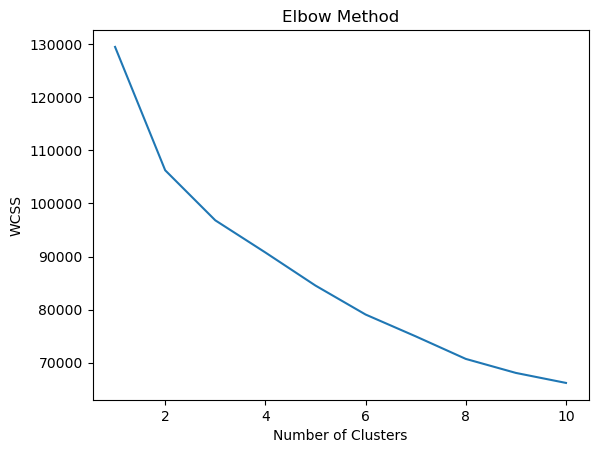

In [9]:
# Calculating WCSS for different values of k
wcss = []
for i in range(1, 11):  # Trying different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
# Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\beite\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

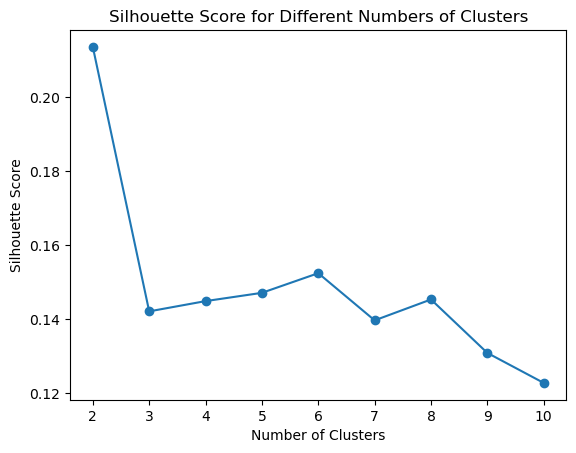

In [10]:


silhouette_scores = []
for n_clusters in range(2, 11):  # Trying different values of k from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11))
plt.show()

In [11]:
##single song


def songRecommendFromBigList(songname):
    #Initialize SpotiPy with user credentials
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                               client_secret=secrets_dict['clientsecret']))
    results = sp.search(q=songname, limit=50)
    
    tracks = json_normalize(results["tracks"]["items"])

    json_normalize(tracks['artists'][0]).columns
    artist_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify', 'song_id'])

    for i in tracks.index:
        artists_for_song = json_normalize(tracks.iloc[i]['artists'])
        artists_for_song['song_id'] = tracks.iloc[i]['id']            # we keep song id, it is the same for all the artists on the song
        artists_for_song['song_name'] = tracks.iloc[i]['name']        # same for song_name
        artists_for_song['popularity'] = tracks.iloc[i]['popularity'] # and for popularity   
        artist_df = pd.concat([artist_df, artists_for_song], axis=0)
    df_final = artist_df[['song_name', 'name', 'song_id', 'popularity']]

    #pick the id of first song that comes up in the search
    single_song_id=df_final.iloc[0,:][2]
    #find the audio features of this song
#     sp.audio_features(single_song_id)


    #get the features needed for the prediction from the dataframe
    singledf= pd.DataFrame(sp.audio_features(single_song_id)[0], index=[0])
    #display(singledf)
    predictsingle=singledf[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'liveness','tempo','key', 'mode', 'valence']]
    
    transformed=scaler.transform(predictsingle)
    
    #predict cluster for this songs id
    songcluster= kmeans.predict(transformed)[0]
    print(songcluster)
    

    #songrecommendation from the same cluster
    random_song_cluster = df[df['cluster'] == songcluster].sample(n=1)
    display(random_song_cluster)
    
    return random_song_cluster



# testsong= df[df['cluster'] == 6].sample(n=1)
# display(testsong)

# THE FUNCTION

In [14]:
# Assuming your dataframe is named df
def recommend_song(df):
    title_input = input("Enter the song title: ").lower()
    if title_input in df['Title'].str.lower().values:
        # Filter dataframe to exclude songs with the input title
        filtered_df = df[df['Title'].str.lower() != title_input]
        # If there are still songs after filtering
        if len(filtered_df) > 0:
            # Select a random song from the filtered dataframe
            random_song = filtered_df.sample()
            recommended_song = random_song.iloc[0]['Title']
            print(f"Recommendation: {recommended_song}")
    else:
        print("test")
        songRecommendFromBigList(title_input)
        
recommend_song(combined_df)        

Enter the song title: bad romance
test
3


,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
5257,Jamming,Bob Marley & The Wailers,5svnF9TMoMnerAMo3mmNnt,0,0.939,0.479,11,-10.986,0,0.282,...,0.723,123.68,audio_features,5svnF9TMoMnerAMo3mmNnt,spotify:track:5svnF9TMoMnerAMo3mmNnt,https://api.spotify.com/v1/tracks/5svnF9TMoMne...,https://api.spotify.com/v1/audio-analysis/5svn...,212640,4,3
